<a href="https://colab.research.google.com/github/arifunsari/YouTube-Video-Chaptering-NLP-Youtub-API-/blob/main/YouTube_Video_Chaptering_(NLP_%2B_Youtub_API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import csv
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi


In [ ]:
#!pip install youtube_transcript_api

In [ ]:
import re
import csv
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi

API_KEY = 'xxxxxxxxxxxxxxxxxxxxx' # Replace with your actual YouTube API key
URL = 'https://youtu.be/CO4E_9V6li0?si=95xdsa0p52KJVxdy'

def get_video_id(url):
    """Extract the video ID from a YouTube URL."""
    video_id_match = re.search(r'(?:v=|\/)([0-9A-Za-z_-]{11})', url)
    return video_id_match.group(1) if video_id_match else None

def get_video_title(video_id):
    """Fetch the title of a YouTube video."""
    youtube = build('youtube', 'v3', developerKey=API_KEY)
    request = youtube.videos().list(part='snippet', id=video_id)
    response = request.execute()
    if 'items' in response and response['items']:
        return response['items'][0]['snippet']['title']
    return 'Unknown Title'

def get_video_transcript(video_id):
    """Fetch transcript using YouTubeTranscriptApi."""
    try:
        return YouTubeTranscriptApi.get_transcript(video_id)
    except Exception as e:
        print(f"Error fetching transcript: {e}")
        return []

def save_to_csv(title, transcript, filename):
    """Save transcript and video title to CSV."""
    transcript_data = [{'start': entry['start'], 'text': entry['text']} for entry in transcript]
    df = pd.DataFrame(transcript_data)
    df.to_csv(filename, index=False)

    with open(filename, 'a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow([])
        writer.writerow(['Video Title:', title])

def main():
    video_id = get_video_id(URL)
    if not video_id:
        print("Invalid URL format.")
        return

    print("Getting title...")
    title = get_video_title(video_id)

    print("Getting transcript...")
    transcript = get_video_transcript(video_id)

    if not transcript:
        print("Transcript not available.")
        return

    filename = f"{video_id}_transcript.csv"
    save_to_csv(title, transcript, filename)
    print(f"Transcript saved to {filename}")

if __name__ == '__main__':
    main()


Getting title...
Getting transcript...
Transcript saved to CO4E_9V6li0_transcript.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
transcript_df = pd.read_csv("/content/CO4E_9V6li0_transcript.csv")
print(transcript_df)

            start                                               text
0            0.04                 today we are going to build end to
1           1.599               endend llm project called cold email
2             4.2           generator using Lama 3.1 open source llm
3            8.12            we will also use chrom ADB Vector store
4            10.4              Lang chain and streamlet let us first
..            ...                                                ...
828       2440.64             share it with your friends if you have
829      2442.319                any question there is a comment box
830       2443.92                                              below
831       2448.32                                            [Music]
832  Video Title:  Gen AI Project Using Llama3.1 | End to End Gen...

[833 rows x 2 columns]


In [ ]:
transcript_df.head()

,start,text
0,0.04,today we are going to build end to
1,1.599,endend llm project called cold email
2,4.2,generator using Lama 3.1 open source llm
3,8.12,we will also use chrom ADB Vector store
4,10.4,Lang chain and streamlet let us first


In [ ]:
transcript_df['start'] = pd.to_numeric(transcript_df['start'], errors='coerce')

print("Dataset Overview:")
print(transcript_df.info())
print("\nBasic Statistics:")
print(transcript_df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   832 non-null    float64
 1   text    833 non-null    object 
dtypes: float64(1), object(1)
memory usage: 13.1+ KB
None

Basic Statistics:
             start
count   832.000000
mean   1225.570030
std     712.471995
min       0.040000
25%     610.550000
50%    1243.940000
75%    1824.940000
max    2448.320000


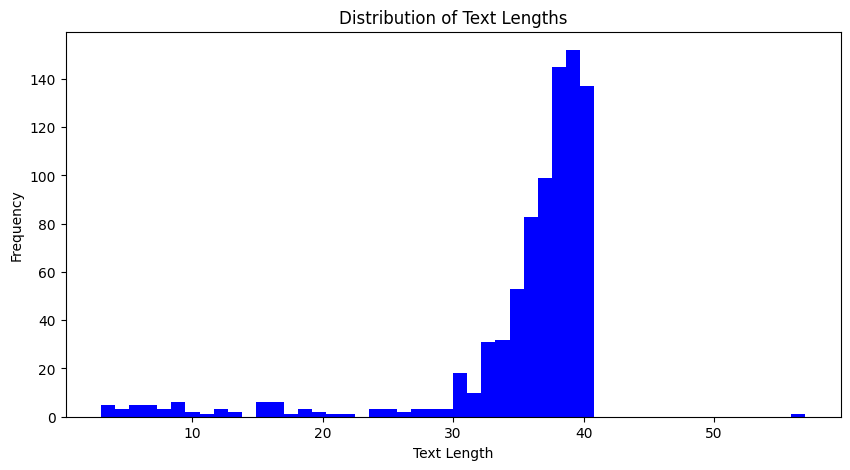

In [ ]:
#distribution of text lengths
transcript_df['text_length'] = transcript_df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,5))
plt.hist(transcript_df['text_length'], bins=50, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

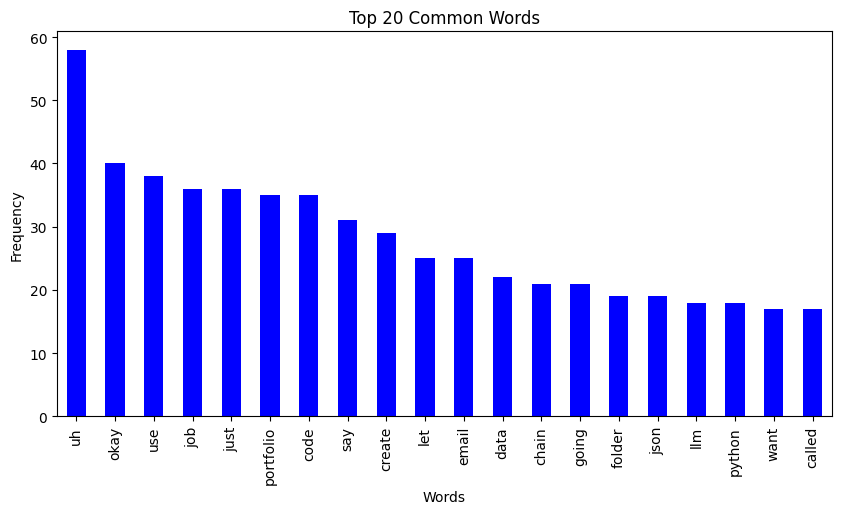

In [ ]:
# most commmon words
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(transcript_df['text'])
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
common_words = word_counts_df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,5))
common_words.plot(kind='bar', color='blue')
plt.title('Top 20 Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
from sklearn.decomposition import NMF
plt.show()

In [ ]:
from sklearn.decomposition import NMF


# topic Modeling using NMF
n_features = 1000
n_topics = 10
n_top_words = 10

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(transcript_df['text'])
nmf = NMF(n_components=n_topics, random_state=42).fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(" ".join(topic_words))
    return topics

topics = display_topics(nmf, tf_feature_names, n_top_words)
print("\nIdentified Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {topic}")


Identified Topics:
Topic 1: uh using llm particular folder company video know st times
Topic 2: okay new page don delhi key documents api description data
Topic 3: portfolio csv links react load data read native app related
Topic 4: just copy um python paste want let project json don
Topic 5: use going client email environment llm persistent um tool companies
Topic 6: job description posting extract llm link json lama skills role
Topic 7: create folder db key chroma api called file going prompt
Topic 8: chain install lang pip gro framework run email function basically
Topic 9: code email created copy paste wrote notebook working cold going
Topic 10: say let collection query run nike main json print id


In [ ]:
pip install nmf

  Preparing metadata (setup.py) ... done
  Created wheel for nmf: filename=nmf-0.0.6-py3-none-any.whl size=3256 sha256=b5ac60aa499e0f2fb8620ffaf916a865bd610cf1989572ae13b6fecebb32e46b
  Stored in directory: /root/.cache/pip/wheels/41/5c/dd/924c7fd528a3ae1695625cccbf46263ae72d14e85080209877
Successfully built nmf


In [ ]:
# get topic distribution for each text segment
topic_distribution = nmf.transform(tf)

# align the lengths by trimming the extra row in topic_distribution
topic_distribution_trimmed = topic_distribution[:len(transcript_df)]

# compute the dominant topic for each text segment
transcript_df['dominant_topic'] = topic_distribution_trimmed.argmax(axis=1)

In [ ]:
# analyze the content of each text segment to manually identify logical breaks
logical_breaks = []

for i in range(1, len(transcript_df)):
    if transcript_df['dominant_topic'].iloc[i] != transcript_df['dominant_topic'].iloc[i - 1]:
        logical_breaks.append(transcript_df['start'].iloc[i])

In [ ]:
# consolidate the logical breaks into broader chapters
threshold = 60  # seconds
consolidated_breaks = []
last_break = None

for break_point in logical_breaks:
    if last_break is None or break_point - last_break >= threshold:
        consolidated_breaks.append(break_point)
        last_break = break_point

In [ ]:
# merge consecutive breaks with the same dominant topic
final_chapters = []
last_chapter = (consolidated_breaks[0], transcript_df['dominant_topic'][0])

for break_point in consolidated_breaks[1:]:
    current_topic = transcript_df[transcript_df['start'] == break_point]['dominant_topic'].values[0]
    if current_topic == last_chapter[1]:
        last_chapter = (last_chapter[0], current_topic)
    else:
        final_chapters.append(last_chapter)
        last_chapter = (break_point, current_topic)

final_chapters.append(last_chapter)  # append the last chapter

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the final chapters to a readable time format
chapter_points = []
chapter_names = []

for i, (break_point, topic_idx) in enumerate(final_chapters):
    chapter_time = pd.to_datetime(break_point, unit='s').strftime('%H:%M:%S')
    chapter_points.append(chapter_time)

    # get the context for the chapter name
    chapter_text = transcript_df[(transcript_df['start'] >= break_point) & (transcript_df['dominant_topic'] == topic_idx)]['text'].str.cat(sep=' ')

    # extract key phrases to create a chapter name
    vectorizer = TfidfVectorizer(stop_words='english', max_features=3)
    tfidf_matrix = vectorizer.fit_transform([chapter_text])
    feature_names = vectorizer.get_feature_names_out()
    chapter_name = " ".join(feature_names)

    chapter_names.append(f"Chapter {i+1}: {chapter_name}")

# display the final chapter points with names
print("\nFinal Chapter Points with Names:")
for time, name in zip(chapter_points, chapter_names):
    print(f"{time} - {name}")


Final Chapter Points with Names:
00:00:01 - Chapter 1: environment going use
00:01:01 - Chapter 2: code database email
00:02:03 - Chapter 3: environment going use
00:03:03 - Chapter 4: just python um
00:04:08 - Chapter 5: chain install lang
00:05:13 - Chapter 6: company uh using
00:06:15 - Chapter 7: just python um
00:07:21 - Chapter 8: code database notebook
00:08:28 - Chapter 9: create db folder
00:10:32 - Chapter 10: chain function install
00:11:39 - Chapter 11: let query say
00:12:43 - Chapter 12: environment going use
00:13:47 - Chapter 13: let query say
00:15:49 - Chapter 14: environment going use
00:16:49 - Chapter 15: data don okay
00:17:55 - Chapter 16: let say text
00:19:06 - Chapter 17: company uh using
00:20:08 - Chapter 18: job json skills
00:22:08 - Chapter 19: create db folder
00:25:14 - Chapter 20: let py say
00:26:18 - Chapter 21: chain function install
00:27:21 - Chapter 22: links portfolio write
00:28:21 - Chapter 23: create file folder
00:29:23 - Chapter 24: job po